# Un meilleur référencement pour les pages AMP ?

In [1]:
import json
import pandas as pd
from IPython.display import display
from PIL import Image
import os
import numpy as np

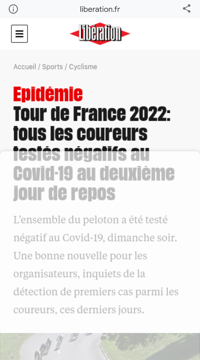

In [2]:
display(Image.open("../img/page_amp.png").resize((200, 360)))

Typiquement les URLs en `https://www.google.com/amp/s/www.liberation.fr/sports/cyclisme/tour-de-france-2022-tous-les-coureurs-testes-negatifs-au-covid-19-au-deuxieme-journee-de-repos-20220711_SWSRLYTWDBH7FLV3NGU3J5CIRU/%3foutputType=amp`

# Chargement des données

Deux types de données sont à notre disposition : 

- Des données de *référencement* (i.e. la position dans les résultats d'un site)
- Des données de *performance* (e.g. la vitesse de chargement du site)

## Données de référencement

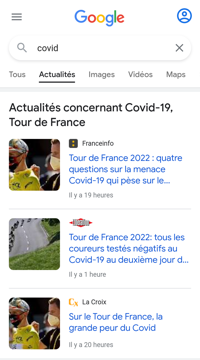

In [3]:
display(Image.open("../img/ecran_resultat.png").resize((200, 360)))

In [4]:
with open("../data/output.json", "r") as f:
    data = json.load(f)

In [5]:
data["experiment"]

{'cookie': 'AEC=AakniGPzCzi288VXsFFQuFFd6Bq7NqoXAa5Tf43SmCY_U2gIm3Kcq51XdA; __Secure-ENID=6.SE=F1deEbnR54J0S9kAcN7Q9_87FooAjHYbrhaP7J1sicSVt1VJQKc0D9Wrm3g3Be0HBqilssQ-fiXkwDur7B_fA_HxTTdYcBAEaQPEhgtTP3IhxObgpeM1clNL1kEHTEBbkTIGleJyzl1gG_yPmz_Fe_dzgG0PiyqbwmWkdlwP9z4; SOCS=CAISHAgCEhJnd3NfMjAyMjA3MjctMF9SQzEaAmZyIAEaBgiAr5yXBg',
 'news': True,
 'queries': ['incendies',
  'pouvoir d’achat',
  "l'île aux enfants",
  'variole du singe',
  'tour de france',
  'port de beyrouth',
  'emmanuel macron',
  'énergie',
  'nichelle nichols',
  '1er aout']}

In [6]:
data["results"]

[{'query': 'incendies',
  'mobile': False,
  'data': [{'amp': False,
    'url': 'https://www.francetvinfo.fr/faits-divers/incendie/incendie-violent-depart-de-feu-dans-le-gard-la-circulation-interrompue-sur-l-a9_5286715.html',
    'domain': 'www.francetvinfo.fr',
    'favion_width': -1},
   {'amp': False,
    'url': 'https://www.lemonde.fr/planete/article/2022/07/31/un-incendie-dans-le-gard-provoque-la-fermeture-partielle-de-l-autoroute-a9-entre-lunel-et-gallargues_6136768_3244.html',
    'domain': 'www.lemonde.fr',
    'favion_width': -1},
   {'amp': False,
    'url': 'https://www.bfmtv.com/societe/incendies-dans-le-gard-plusieurs-blesses-des-habitations-evacuees-et-plus-de-200-hectares-brules_AN-202207310220.html',
    'domain': 'www.bfmtv.com',
    'favion_width': -1},
   {'amp': False,
    'url': 'https://www.ouest-france.fr/faits-divers/incendie/un-nouvel-incendie-detruit-150-hectares-de-pins-dans-les-landes-b748c8af-32c9-4644-8988-9cb400a6c6c5',
    'domain': 'www.ouest-france.fr'

In [7]:
def preprocess_ranking_data(data):
    df = pd.DataFrame()

    for item in data["results"]:
        query = item["query"]
        mobile = item["mobile"]
        value = item["data"]

        sub_data = pd.DataFrame(value, columns = ["amp", "url", "domain", "window_size"])
        sub_data["rank"] = range(1, len(value) + 1)
        sub_data["query"] = query
        sub_data["mobile"] = mobile
        df = pd.concat([df, sub_data])
    df = df.reset_index()
    df["short_domain"] = df["domain"].apply(lambda x: x.split(".")[-2])
    df = df[df["rank"] < 5]
    return df

In [8]:
df = preprocess_ranking_data(data)

In [9]:
df.head()

index    amp                                                url  \
0       0  False  https://www.francetvinfo.fr/faits-divers/incen...   
1       1  False  https://www.lemonde.fr/planete/article/2022/07...   
2       2  False  https://www.bfmtv.com/societe/incendies-dans-l...   
3       3  False  https://www.ouest-france.fr/faits-divers/incen...   
20      0  False  https://www.francetvinfo.fr/faits-divers/incen...   

                 domain  window_size  rank      query  mobile  short_domain  
0   www.francetvinfo.fr          NaN     1  incendies   False  francetvinfo  
1        www.lemonde.fr          NaN     2  incendies   False       lemonde  
2         www.bfmtv.com          NaN     3  incendies   False         bfmtv  
3   www.ouest-france.fr          NaN     4  incendies   False  ouest-france  
20  www.francetvinfo.fr          NaN     1  incendies    True  francetvinfo

## Données de performance

Pour chacun des sites, trois audits sont réalisés, puis les résultats sont moyennés. Chacun des audits évalue la performance du site au regard de 4 métriques : 

- First Contentful Paint (FCP) : durée avant l'apparition sur l'écran de l'utilisateur du 1er pixel du site
- Largest Contentful Paint (LCP) : durée avant l'apparition sur l'écran de la page dans sa version finale
- Time To Interactive (TTI) : durée avant que l'utilisateur ne puisse interagir avec la page
- Speed Index (SI)


De ces 4 métriques, Lighthouse calcule un score de performance qui est directement utilisé pour le référencement.

In [10]:
audits = pd.read_csv("../data/audit_2.csv")
grouped_audits = audits.groupby("url")[["fcp", "lcp", "tti", "si", "score"]].mean().sort_values("lcp")
grouped_audits.head()

fcp        lcp  \
url                                                                        
https://www-lexpress-fr.cdn.ampproject.org/c/s/...  1039.8870  1073.2870   
https://amp-ouest--france-fr.cdn.ampproject.org...  1077.2556  1084.9556   
https://www-radioclassique-fr.cdn.ampproject.or...  1109.2056  1117.2056   
https://www-bfmtv-com.cdn.ampproject.org/c/s/ww...  1112.7362  1150.5362   
https://www.francetvinfo.fr/monde/proche-orient...  1098.5720  1333.9883   

                                                          tti           si  \
url                                                                          
https://www-lexpress-fr.cdn.ampproject.org/c/s/...  1790.4764  3706.144658   
https://amp-ouest--france-fr.cdn.ampproject.org...  2542.2456  2774.829552   
https://www-radioclassique-fr.cdn.ampproject.or...  2839.0572  1952.899200   
https://www-bfmtv-com.cdn.ampproject.org/c/s/ww...  2762.9212  1775.610144   
https://www.francetvinfo.fr/monde/proche-orient...  9636.5579  2903.978568   

                                                    score  
url                                                        
https://www-lexpress-fr.cdn.ampproject.org/c/s/...  0.982  
https://amp-ouest--france-fr.cdn.ampproject.org...  0.990  
https://www-radioclassique-fr.cdn.ampproject.or...  0.994  
https://www-bfmtv-com.cdn.ampproject.org/c/s/ww...  0.992  
https://www.francetvinfo.fr/monde/proche-orient...  0.816

In [11]:
audited_urls = grouped_audits.loc[df["url"]]
df = df.assign(**{
    "fcp": np.round(audited_urls["fcp"].values),
    "lcp": np.round(audited_urls["lcp"].values),
    "tti": np.round(audited_urls["tti"].values),
    "si": np.round(audited_urls["si"].values),
    "score": np.round(audited_urls["score"].values, 3)
})

# Analyse

In [12]:
mobile_df = df[df["mobile"]]
desktop_df = df[~df["mobile"]]

In [13]:
mobile_df.groupby("short_domain")["query"].count().sort_values(ascending=False).head(10)

short_domain
francetvinfo      8
bfmtv             4
lefigaro          4
lemonde           4
sudouest          3
20minutes         1
lexpress          1
tf1info           1
rtl               1
radioclassique    1
Name: query, dtype: int64

In [14]:
desktop_df.groupby("short_domain")["query"].count().sort_values(ascending=False).head(10)

short_domain
francetvinfo      8
bfmtv             4
lefigaro          4
lemonde           4
sudouest          3
20minutes         1
lexpress          1
tf1info           1
rtl               1
radioclassique    1
Name: query, dtype: int64

Quels sont les domaines AMP et non AMP ?

Domaines AMP

In [15]:
amp_domains = set(mobile_df[mobile_df["amp"] == True]["short_domain"])
print(amp_domains)

{'lefigaro', 'yahoo', 'radioclassique', 'sudouest', 'capital', 'lexpress', 'france24', 'numerama', 'allodocteurs', '20minutes', 'tf1info', 'bfmtv', 'lesechos', 'ouest-france', 'lindependant', 'rtl', 'ladepeche'}


In [16]:
non_amp_domains = set(mobile_df[mobile_df["amp"] == False]["short_domain"])

Domaines non AMP

In [17]:
print(non_amp_domains.difference(amp_domains))

{'allocine', 'francetvinfo', 'letelegramme', 'lequipe', 'lemonde'}


Domaines AMP et non AMP

In [18]:
print(non_amp_domains.intersection(amp_domains))

{'lefigaro', 'bfmtv'}


In [21]:
mobile_df["window_size"] = mobile_df["window_size"].astype("Int16")

/tmp/ipykernel_29880/2810671457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_df["window_size"] = mobile_df["window_size"].astype("Int16")


In [22]:
df.set_index(["query", "mobile", "rank"]).sort_values(["query", "mobile"]).head(40)[["amp", "domain", "url", "score", "si", "fcp", "lcp", "tti"]]

amp               domain  \
query             mobile rank                               
1er aout          False  1     False     www.numerama.com   
                         2     False  www.allodocteurs.fr   
                         3     False       www.tf1info.fr   
                         4     False     www.20minutes.fr   
                  True   1      True     www.numerama.com   
                         2      True  amp.allodocteurs.fr   
                         3      True       www.tf1info.fr   
                         4      True       m.20minutes.fr   
emmanuel macron   False  1     False        www.bfmtv.com   
                         2     False      www.sudouest.fr   
                         3     False    video.lefigaro.fr   
                         4     False      www.lefigaro.fr   
                  True   1      True        www.bfmtv.com   
                         2      True      www.sudouest.fr   
                         3     False    video.lefigaro.fr   
                         4      True      amp.lefigaro.fr   
incendies         False  1     False  www.francetvinfo.fr   
                         2     False       www.lemonde.fr   
                         3     False        www.bfmtv.com   
                         4     False  www.ouest-france.fr   
                  True   1     False  www.francetvinfo.fr   
                         2     False       www.lemonde.fr   
                         3      True        www.bfmtv.com   
                         4      True  amp.ouest-france.fr   
l'île aux enfants False  1     False       www.lemonde.fr   
                         2     False  www.francetvinfo.fr   
                         3     False  www.letelegramme.fr   
                         4     False      www.sudouest.fr   
                  True   1     False       www.lemonde.fr   
                         2     False  www.francetvinfo.fr   
                         3     False  www.letelegramme.fr   
                         4      True      www.sudouest.fr   
nichelle nichols  False  1     False       www.lemonde.fr   
                         2     False      www.lefigaro.fr   
                         3     False    fr.news.yahoo.com   
                         4     False      www.allocine.fr   
                  True   1     False       www.lemonde.fr   
                         2      True      amp.lefigaro.fr   
                         3      True    fr.news.yahoo.com   
                         4     False      www.allocine.fr   

                                                                             url  \
query             mobile rank                                                      
1er aout          False  1     https://www.numerama.com/sciences/1058614-fin-...   
                         2     https://www.allodocteurs.fr/soignants-non-vacc...   
                         3     https://www.tf1info.fr/sante/covid-19-pass-san...   
                         4     https://www.20minutes.fr/societe/3331223-20220...   
                  True   1     https://www.numerama.com/sciences/1058614-fin-...   
                         2     https://amp.allodocteurs.fr/soignants-non-vacc...   
                         3     https://www.tf1info.fr/amp/sante/covid-19-pass...   
                         4                  https://m.20minutes.fr/amp/a/3331223   
emmanuel macron   False  1     https://www.bfmtv.com/international/afrique/ma...   
                         2     https://www.sudouest.fr/international/afrique/...   
                         3     https://video.lefigaro.fr/figaro/video/le-mali...   
                         4     https://www.lefigaro.fr/politique/hommages-a-j...   
                  True   1     https://www.bfmtv.com/amp/international/afriqu...   
                         2     https://www.sudouest.fr/international/afrique/...   
                         3     https://video.lefigaro.fr/figaro/video/le-mali...   
                         4     https://amp